# Encoding Numerical Features
## Two type : 1. Discretization 2. Binarization
### 1.Discretization have three type  
### 1.1 Unspervised Binning  1.2 spervised Binning  1.3 Custom Binning
#### 1.1 Unspervised Binning have three type 
##### i.Equal width(Uniform Binning)  ii. Equal Frquency(Quantile)  iii. Kmeans Binning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [5]:
from sklearn.compose import ColumnTransformer

In [6]:
from sklearn.preprocessing import KBinsDiscretizer

In [7]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.shape

(891, 3)

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(714, 3)

In [13]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


## Without Binning Check the Accuracy 

In [14]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.6293706293706294

In [17]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6317097026604068

## Now Apply Binning

In [18]:
kbin_age=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [19]:
kbin_fare=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [20]:
kbin_age

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [28]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [29]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [32]:
clf=DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)

y_pred2=clf.predict(x_test_trf)

accuracy_score(y_test,y_pred2)

0.6223776223776224

In [33]:
x_trf=trf.fit_transform(x)

In [38]:
np.mean(cross_val_score(DecisionTreeClassifier(),x_trf,y,cv=10,scoring='accuracy'))

0.682140062597809

# Function

In [48]:
def discretizer(bins,strategy):
    kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf=ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    x_trf=trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x_trf,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title('After')

0.682140062597809


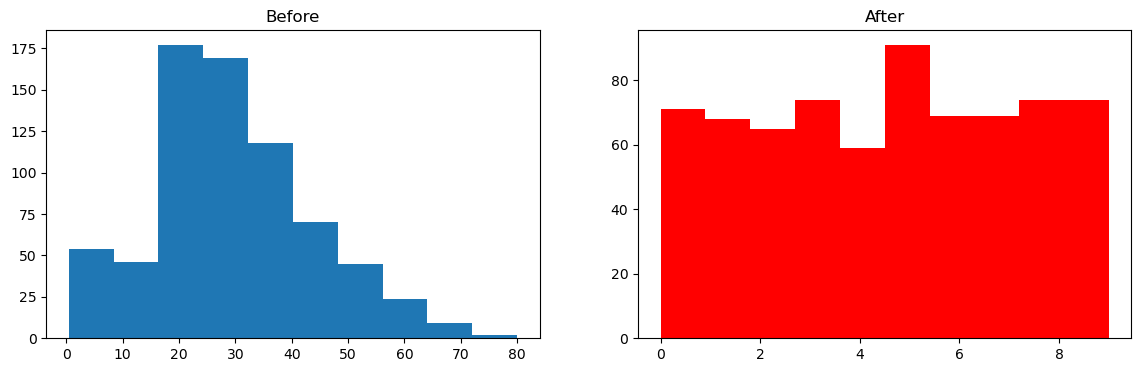

In [45]:
discretizer(10,'quantile')

0.6864632237871675


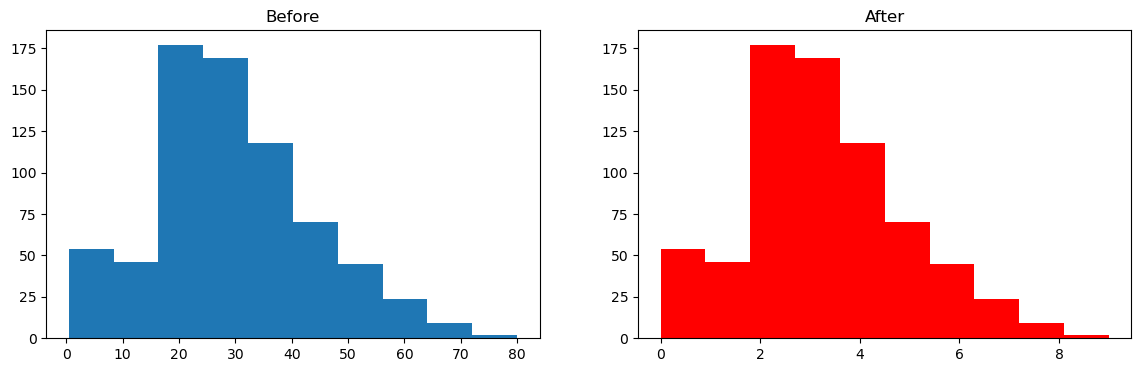

In [56]:
discretizer(10,'uniform')

In [57]:
x_trf

array([[3., 0.],
       [7., 8.],
       [4., 2.],
       ...,
       [2., 7.],
       [4., 7.],
       [6., 1.]])

# 2. Binarization

In [59]:
df2=pd.read_csv('train.csv',usecols=['Age','Fare','SibSp','Parch','Survived'])

In [60]:
df2.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [62]:
df2.shape

(891, 5)

In [63]:
df2.dropna(inplace=True)

In [64]:
df2.shape

(714, 5)

In [65]:
df2['Family']=df2['Parch']+df2['SibSp']

In [66]:
df2.head()

,Survived,Age,SibSp,Parch,Fare,Family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0


In [69]:
df2.drop(columns=['SibSp','Parch'],inplace=True)

In [70]:
df2.head()

,Survived,Age,Fare,Family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [71]:
x=df2.drop(columns=['Survived'])
y=df2['Survived']

In [72]:
x.head()

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0


In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Accuracy check without Binarization

In [74]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

y_pred3=clf.predict(x_test)
accuracy_score(y_test,y_pred3)

0.6153846153846154

In [76]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=15,scoring='accuracy'))

0.6429078014184397

### Now Apply Binarization On Family column to convert 0 , 1   (0=alone travel , 1=travel with family)

In [79]:
from sklearn.preprocessing import Binarizer

In [80]:
trf=ColumnTransformer([
    ('bin',Binarizer(copy=False),['Family'])
],remainder='passthrough')

In [90]:
x_train_trf3=trf.fit_transform(x_train)
x_test_trf3=trf.transform(x_test)

In [88]:
pd.DataFrame(x_train_trf2,columns=['Family','Age','Fare|']).head()

,Family,Age,Fare|
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000


In [89]:
clf=DecisionTreeClassifier()
clf.fit(x_train_trf2,y_train)

y_pred4=clf.predict(x_test_trf2)

accuracy_score(y_test,y_pred3)

0.6153846153846154

In [92]:
x_trf3=trf.fit_transform(x)


In [93]:
np.mean(cross_val_score(DecisionTreeClassifier(),x_trf,y,cv=10,scoring='accuracy'))

0.682140062597809

In [95]:
x_trf3

array([[ 1.    , 22.    ,  7.25  ],
       [ 1.    , 38.    , 71.2833],
       [ 0.    , 26.    ,  7.925 ],
       ...,
       [ 0.    , 19.    , 30.    ],
       [ 0.    , 26.    , 30.    ],
       [ 0.    , 32.    ,  7.75  ]])